<a href="https://colab.research.google.com/github/JazmineOrtiz/Simulaci-n-I/blob/main/Inventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import random  # Importa el módulo random para generar números aleatorios
from prettytable import PrettyTable as pt  # Importa PrettyTable para crear tablas formateadas
import matplotlib.pyplot as plt

# Función para obtener un valor aleatorio de 'x' basado en un rango de 'R'
def acumulada_inversa():
    R = random.uniform(0, 1)  # Genera un número aleatorio entre 0 y 1
    # Devuelve un valor en función del rango en el que cae 'R'
    #XD
    if 0.000 <= R < 0.010:
        return 35
    elif 0.010 <= R < 0.025:
        return 36
    elif 0.025 <= R < 0.045:
        return 37
    elif 0.045 <= R < 0.065:
        return 38
    elif 0.065 <= R < 0.087:
        return 39
    elif 0.087 <= R < 0.110:
        return 40
    elif 0.110 <= R < 0.135:
        return 41
    elif 0.135 <= R < 0.162:
        return 42
    elif 0.162 <= R < 0.190:
        return 43
    elif 0.190 <= R < 0.219:
        return 44
    elif 0.219 <= R < 0.254:
        return 45
    elif 0.254 <= R < 0.299:
        return 46
    elif 0.299 <= R < 0.359:
        return 47
    elif 0.359 <= R < 0.424:
        return 48
    elif 0.424 <= R < 0.494:
        return 49
    elif 0.494 <= R < 0.574:
        return 50
    elif 0.574 <= R < 0.649:
        return 51
    elif 0.649 <= R < 0.719:
        return 52
    elif 0.719 <= R < 0.784:
        return 53
    elif 0.784 <= R < 0.844:
        return 54
    elif 0.844 <= R < 0.894:
        return 55
    elif 0.894 <= R < 0.934:
        return 56
    elif 0.934 <= R < 0.964:
        return 57
    elif 0.964 <= R < 0.980:
        return 58
    elif 0.980 <= R < 0.995:
        return 59
    elif 0.995 <= R <= 1.000:
        return 60
    else:
        return None  # Por si acaso R no cae en ningún rango esperado

# Lista acumulada para las probabilidades
L_acumulada = []
acum = 0  # Inicializa el acumulador en 0
for i in probabilidad:
    acum += i  # Suma la probabilidad actual al acumulador
    L_acumulada.append(acum)  # Añade el valor acumulado a la lista

# Función que devuelve un valor de la lista dependiendo de la lista acumulada
def acumulada_inversa(u1=0.5):
    for i in range(len(L_acumulada)):
        if u1 < L_acumulada[i]:  # Compara el valor u1 con los valores acumulados
            return cantidad[i]  # Devuelve el valor correspondiente si u1 es menor
        elif i < len(L_acumulada) - 1 and L_acumulada[i] <= u1 < L_acumulada[i + 1]:
            return cantidad[i + 1]  # Devuelve el siguiente valor si u1 está en el rango

# Datos de tiempos de entrega y sus probabilidades
tiempo_entrega = [1, 2, 3]  # Lista de tiempos de entrega posibles
proba_entrega = [0.3, 0.4, 0.3]  # Lista de probabilidades correspondientes

# Lista acumulada para las probabilidades de entrega
L_proba_entrega = []
acum = 0  # Reinicia el acumulador
for i in proba_entrega:
    acum += i  # Suma la probabilidad actual al acumulador
    L_proba_entrega.append(acum)  # Añade el valor acumulado a la lista

# Función que devuelve un tiempo de entrega dependiendo de la lista acumulada
def proba_inversa(u2=0.5):
    for i in range(len(tiempo_entrega)):
        if u2 < L_proba_entrega[i]:  # Compara el valor u2 con los valores acumulados
            return tiempo_entrega[i]  # Devuelve el tiempo de entrega correspondiente si u2 es menor
        elif i < len(L_proba_entrega) - 1 and L_proba_entrega[i] <= u2 < L_proba_entrega[i + 1]:
            return tiempo_entrega[i + 1]  # Devuelve el siguiente tiempo si u2 está en el rango

# Lista y variables del ejercicio
factor_estacionario = [1.2, 1.0, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1.0, 1.2, 1.3, 1.4]  # Factor estacional para cada mes
No_de_unidades_a_ordenar = 200  # Número de unidades a ordenar
inventario_inicial = 150  # Inventario inicial
reorden = 100  # Punto de reorden

pedido_pendiente = False  # Indica si hay un pedido pendiente
tiempo_pedido_pendiente = 0  # Tiempo restante para recibir el pedido pendiente
Total_de_ordenes = 0  # Contador de órdenes totales
Falta_total = 0  # Acumulador de faltantes totales
Total_IMP = 0  # Acumulador del inventario mensual promedio

# Iniciamos la tabla
Tabla = pt(['Mes', 'Inv.inicial', 'Demanda', 'Inv.final', 'Faltante', 'Orden', 'Inv.mensual'])

# Simulación del inventario
for i in range(12):
    aux = inventario_inicial  # Guarda el inventario inicial del mes
    No_aleatorio = random.uniform(0, 1)  # Genera un número aleatorio entre 0 y 1
    Demanda_ajustada = int(acumulada_inversa(No_aleatorio) * factor_estacionario[i])  # Calcula la demanda ajustada
    inventario_final = inventario_inicial - Demanda_ajustada  # Calcula el inventario final

    if inventario_final > 0:
        inventario_mensual_promedio = (aux + inventario_final) / 2  # Calcula el inventario mensual promedio
    else:
        inventario_mensual_promedio = (aux / 2) * (aux / Demanda_ajustada)  # Calcula el promedio en caso de faltante

    Total_IMP += inventario_mensual_promedio  # Suma al total del inventario mensual promedio

    if inventario_final >= 0:
        faltante = 0  # No hay faltante si el inventario final es positivo
    else:
        faltante = abs(inventario_final)  # Calcula el faltante
        Falta_total += faltante  # Suma al faltante total
        inventario_final = 0  # El inventario final no puede ser negativo

    if pedido_pendiente:
        tiempo_pedido_pendiente -= 1  # Reduce el tiempo de espera del pedido pendiente
        if tiempo_pedido_pendiente == 0:
            inventario_final += No_de_unidades_a_ordenar  # Añade las unidades ordenadas al inventario
            pedido_pendiente = False  # Ya no hay pedido pendiente

    if inventario_final < reorden and not pedido_pendiente:
        aleator = random.uniform(0, 1)  # Genera un número aleatorio
        tiempo_pedido_pendiente = proba_inversa(aleator)  # Calcula el tiempo del pedido
        pedido_pendiente = True  # Indica que hay un pedido pendiente
        orden = 1  # Marca que se hizo un pedido
        Total_de_ordenes += 1  # Incrementa el contador de órdenes
    else:
        orden = 0  # No se hizo un pedido

    # Añade la fila a la tabla
    lista_tabla = [i + 1, aux, Demanda_ajustada, inventario_final, faltante, orden, inventario_mensual_promedio]
    Tabla.add_row(lista_tabla)

    inventario_inicial = inventario_final  # Actualiza el inventario inicial para el siguiente mes

# Imprimimos la tabla final y el resumen de costos
print(Tabla)
print("Ordenes:", Total_de_ordenes)
print("Falta total:",Falta_total)
print("Total de Imp:", Total_IMP)

#Se calcula cada costo y así como el costo total del inventario
Costo_llevar_inventario = Total_IMP*1.67
Costo_faltante = Falta_total*50
Costo_ordenar = Total_de_ordenes*100
Costo_total = Costo_llevar_inventario + Costo_faltante + Costo_ordenar
print('Costo total de ordenes: ',Costo_ordenar)
print('Costo total del inventario: ',Costo_llevar_inventario)
print('Costo total del faltante: ',Costo_faltante)
print('Costo neto: ',Costo_total)

+-----+-------------+---------+-----------+----------+-------+--------------------+
| Mes | Inv.inicial | Demanda | Inv.final | Faltante | Orden |    Inv.mensual     |
+-----+-------------+---------+-----------+----------+-------+--------------------+
|  1  |     150     |    60   |     90    |    0     |   1   |       120.0        |
|  2  |      90     |    42   |     48    |    0     |   0   |        69.0        |
|  3  |      48     |    39   |    209    |    0     |   0   |        28.5        |
|  4  |     209     |    43   |    166    |    0     |   0   |       187.5        |
|  5  |     166     |    30   |    136    |    0     |   0   |       151.0        |
|  6  |     136     |    37   |     99    |    0     |   1   |       117.5        |
|  7  |      99     |    42   |    257    |    0     |   0   |        78.0        |
|  8  |     257     |    39   |    218    |    0     |   0   |       237.5        |
|  9  |     218     |    52   |    166    |    0     |   0   |       192.0  

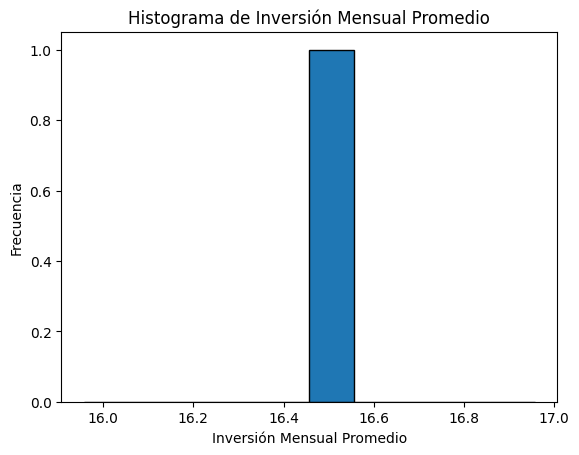

In [46]:
# Generar histograma de inversión mensual promedio
plt.hist(inventario_mensual_promedio, bins=10, edgecolor='black')
plt.title('Histograma de Inversión Mensual Promedio')
plt.xlabel('Inversión Mensual Promedio')
plt.ylabel('Frecuencia')
plt.show()

No me salió esto XD :"v

In [50]:
def simulacion(No_de_unidades_a_ordenar, reorden, n=50):  # Define una función cuyos parámetros son las unidades a ordenar, el reorden y el número de iteraciones
    List_1 = []  # Lista para almacenar los costos de ordenar promedio
    List_2 = []  # Lista para almacenar los costos de llevar inventario promedio
    List_3 = []  # Lista para almacenar los costos faltantes promedio
    List_4 = []  # Lista para almacenar los costos totales promedio
    SUM_1 = 0  # acumulada de costos
    SUM_2 = 0  # acumulada de costos de llevar inventario
    SUM_3 = 0  # acumulada de costos faltantes
    SUM_4 = 0  # acumulada de costos totales
    t = 1  # Contador de iteraciones
    for i in range(n):  # Itera n veces
        factor_estacionario = [1.2, 1.0, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1.0, 1.2, 1.3, 1.4]  # Factor estacional para cada mes
        No_de_unidades_a_ordenar = 200  # Número de unidades a ordenar
        inventario_inicial = 150  # Inventario inicial
        reorden = 100  # Punto de reorden
        pedido_pendiente = False  # Indica si hay un pedido pendiente
        tiempo_pedido_pendiente = 0  # Tiempo restante para recibir el pedido pendiente
        Total_de_ordenes = 0  # Contador de órdenes totales
        Falta_total = 0  # Acumulador de faltantes totales
        Total_IMP = 0  # Acumulador del inventario mensual promedio
        for j in range(12):  # Itera 12 veces para simular los 12 meses del año
            aux = inventario_inicial  # Guarda el inventario inicial del mes
            No_aleatorio = random.uniform(0, 1)  # Genera un número aleatorio entre 0 y 1
            Demanda_ajustada = int(acumulada_inversa(No_aleatorio) * factor_estacionario[j])  # Calcula la demanda ajustada
            inventario_final = inventario_inicial - Demanda_ajustada  # Calcula el inventario final

            if inventario_final > 0:
                inventario_mensual_promedio = (aux + inventario_final) / 2  # Calcula el inventario mensual promedio
                Total_IMP += inventario_mensual_promedio  # Suma al total del inventario mensual promedio
            else:
                inventario_mensual_promedio = round((aux / 2) * (aux / Demanda_ajustada))  # Calcula el promedio en caso de faltante
                Total_IMP += inventario_mensual_promedio  # Suma al total del inventario mensual promedio

            if inventario_final >= 0:
                faltante = 0  # No hay faltante si el inventario final es positivo
            else:
                faltante = abs(inventario_final)  # Calcula el faltante
                Falta_total += faltante  # Suma al faltante total
                inventario_final = 0  # El inventario final no puede ser negativo

            # Control del pedido pendiente
            if pedido_pendiente:
                tiempo_pedido_pendiente -= 1  # Reduce el tiempo de espera del pedido pendiente
                if tiempo_pedido_pendiente == 0:
                    inventario_final += No_de_unidades_a_ordenar  # Añade las unidades ordenadas al inventario
                    pedido_pendiente = False  # Ya no hay pedido pendiente

            # Revisión de la necesidad de reordenar
            if inventario_final < reorden and not pedido_pendiente:
                aleator = random.uniform(0, 1)  # Genera un número aleatorio
                tiempo_pedido_pendiente = proba_inversa(aleator)  # Calcula el tiempo del pedido
                pedido_pendiente = True  # Indica que hay un pedido pendiente
                orden = 1  # Marca que se hizo un pedido
                Total_de_ordenes += 1  # Incrementa el contador de órdenes
            else:
                orden = 0  # No se hizo un pedido

            inventario_inicial = inventario_final  # Actualiza el inventario inicial para el siguiente mes

        # Cálculo de costos
        Costo_llevar_inventario = Total_IMP * 1.67  # Calcula el costo de llevar inventario
        Costo_faltante = Falta_total * 50  # Calcula el costo de faltantes
        Costo_ordenar = Total_de_ordenes * 100  # Calcula el costo de ordenar
        Costo_total = Costo_llevar_inventario + Costo_faltante + Costo_ordenar  # Calcula el costo total

        # Suma acumulada de costos
        SUM_1 += Costo_ordenar
        SUM_2 += Costo_llevar_inventario
        SUM_3 += Costo_faltante
        SUM_4 += Costo_total

        # Almacena los costos promedios
        List_1.append(SUM_1 / t)
        List_2.append(SUM_2 / t)
        List_3.append(SUM_3 / t)
        List_4.append(SUM_4 / t)
        t += 1  # Incrementa el contador de iteraciones

    return List_1[-1], List_2[-1], List_3[-1], List_4[-1]  # Devuelve los últimos valores de las listas, que son los promedios finales

# Ejecutamo simulación
LIS1, LIS2, LIS3, LIS4 = simulacion(200, 100, 5000)  # Ejecuta la simulación con 5000 iteraciones
# Imprimir valores
print("Costo promedio de orden:", LIS1)
print("Costo promedio del inventario:", LIS2)
print("Costo faltante promedio:", LIS3)
print("Costo total promedio:", LIS4)

# Hooke-Jeeves para optimiza
def hooke_jeeves(f, x0, delta=0.5, epsilon=1e-5, max_iter=100):  # Define la función Hooke-Jeeves
    n = len(x0)  # Número de parámetros
    x = np.array(x0)  # Vector de parámetros
    xp = np.array(x0)  # Vector de parámetros anteriores
    xb = np.array(x0)  # Vector de mejores parámetros
    for i in range(max_iter):  # Itera hasta el máximo de iteraciones
        for j in range(n):  # Itera sobre cada parámetro
            d = np.zeros(n)  # Vector de dirección
            d[j] = delta  # Establece la dirección del parámetro actual
            if f(xb + d) < f(xb):
                xb = xb + d  # Actualiza la mejor posición
            elif f(xb - d) < f(xb):
                xb = xb - d  # Actualiza la mejor posición
        if np.linalg.norm(xb - xp) < epsilon:  # Comprueba la convergencia
            break  # n Sale del bucle si ha convergido
        xp = xb + (xb - xp)  # Actualiza la posición anterior
        if f(xp) < f(xb):
            xb = xp  # Actualiza la mejor posición
        x = xb  # Actualiza la posición actual
    return xb  # Devuelve la mejor posición encontrada

# Función de costo total para optimizar
def costo_total(params):
    No_de_unidades_a_ordenar, reorden = params  # Desempaqueta los parámetros
    _, _, _, Costo_total = simulacion(No_de_unidades_a_ordenar, reorden, 1000)  # Ejecuta la simulación con 1000 iteraciones
    return Costo_total  # Devuelve el costo total

# Parámetros iniciales: [No_de_unidades_a_ordenar, reorden]
x0 = [200, 100]

# Encontrar el óptimo
optimo = hooke_jeeves(costo_total, x0)  # Encuentra el óptimo usando Hooke-Jeeves
No_de_unidades_a_ordenar_optimo, reorden_optimo = optimo  # Desempaqueta los valores óptimos

print(f"Número optimo para ordenar: {No_de_unidades_a_ordenar_optimo}")
print(f"Óptimo reorden: {reorden_optimo}")

# Calcular los costos con los valores óptimos
Costo_ordenar_optimo, Costo_llevar_inventario_optimo, Costo_faltante_optimo, Costo_total_optimo = simulacion(No_de_unidades_a_ordenar_optimo, reorden_optimo)
print(f"Costo óptimo: {Costo_ordenar_optimo}")
print(f"Costo del inventario óptimo: {Costo_llevar_inventario_optimo}")
print(f"Faltante óptimo: {Costo_faltante_optimo}")
print(f"Total óptimo: {Costo_total_optimo}")


Costo promedio de orden: 296.88
Costo promedio del inventario: 1987.9130570000007
Costo faltante promedio: 2444.23
Costo total promedio: 4729.023056999994
Número optimo para ordenar: 200.0
Óptimo reorden: 104.0
Costo óptimo: 300.0
Costo del inventario óptimo: 1940.2727999999995
Faltante óptimo: 2474.0
Total óptimo: 4714.272800000001
